In [1]:
data_path  = "/content/drive/MyDrive/Colab Notebooks/NLP/Fake_News_train.csv/train.csv"

In [2]:
import pandas as pd
import re
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
raw = pd.read_csv(data_path)
raw.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**Note:**
- Data has 5 columns where primary independent feature is text and that will be used for training the model. Apart from that the label column as classes 0,1 (Binary Classification). Columns like title and author will be ignored in this project

In [4]:
raw.dropna(inplace=True)
raw.reset_index(inplace=True)

In [5]:
X, Y = raw['text'], raw['label']

In [6]:
X.head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    Ever get the feeling your life circles the rou...
2    Why the Truth Might Get You Fired October 29, ...
3    Videos 15 Civilians Killed In Single US Airstr...
4    Print \nAn Iranian woman has been sentenced to...
Name: text, dtype: object

In [7]:
X[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1. Text Preprocessing 

In [9]:
stemmer = PorterStemmer()
corpus = []
for i in range(len(X)):
  #removing chaacters other than words
  text = re.sub("[^a-zA-Z]",' ', X[i])
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  corpus.append(text)

  




### 2. Converting into Bag of words 

In [12]:
cv = CountVectorizer(max_features= 5000, ngram_range = (1,2))
X = cv.fit_transform(corpus).toarray()

In [13]:
cv.get_feature_names()[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron', 'abandon', 'abc', 'abe', 'abedin']

In [15]:
vector_df = pd.DataFrame(X, columns=cv.get_feature_names())
vector_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young man,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Note:**
This shows that the bag of words is not set to binary as it is capturing the frequency of the words in the text as well

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15, random_state= 1345)

### 3. Model Prepration and Training 
- Multinomial Naive Bayes (with hyperparameter tuning)
- Passive Agressive Regressor 


In [19]:
## Confusion Matrix plotting function 
import matplotlib.pyplot as plt
from sklearn import metrics 
import itertools
% matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model Accuracy on Test: 0.902
Confusion matrix, without normalization
F1_score: 0.902
Precision: 0.9120492524186455 
 Recall:0.8605809128630706


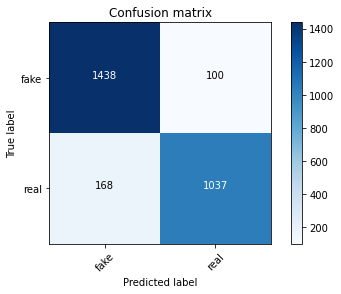

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(x_train,y_train)
predictions_NB = clf.predict(x_test)
score = metrics.accuracy_score(y_test,predictions_NB)
print("Model Accuracy on Test: %0.3f"%score)
conf_matrix  = metrics.confusion_matrix(y_test,predictions_NB)
plot_confusion_matrix(conf_matrix,classes=['fake','real'])
f1_score = metrics.f1_score(y_test,predictions_NB,average='weighted')
print("F1_score: %0.3f"%f1_score)
precision = metrics.precision_score(y_test,predictions_NB)
recall = metrics.recall_score(y_test,predictions_NB)
print (f"Precision: {precision} \n Recall:{recall}")

In [26]:
cfl = MultinomialNB(alpha = 0.1)
model_performance = []
for alpha in np.arange(0,1,0.1):
  temp_clf = MultinomialNB(alpha = alpha)
  temp_clf.fit(x_train,y_train)
  preds = temp_clf.predict(x_test)
  score = metrics.accuracy_score(y_test,preds)
  model_performance.append((alpha,score))
  print(f"for Alpha = {alpha}:: Model score = {score}")

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


for Alpha = 0.0:: Model score = 0.9026613197229311
for Alpha = 0.1:: Model score = 0.9030258840685381
for Alpha = 0.2:: Model score = 0.9030258840685381
for Alpha = 0.30000000000000004:: Model score = 0.9030258840685381
for Alpha = 0.4:: Model score = 0.9030258840685381
for Alpha = 0.5:: Model score = 0.9030258840685381
for Alpha = 0.6000000000000001:: Model score = 0.9026613197229311
for Alpha = 0.7000000000000001:: Model score = 0.9022967553773241
for Alpha = 0.8:: Model score = 0.9022967553773241
for Alpha = 0.9:: Model score = 0.9022967553773241


In [30]:
print(f"Best Performance is for alpha : {model_performance[np.argmax(model_performance)][0]}   accuracy: {round(model_performance[np.argmax(model_performance)][1]*100,2)}")

Best Performance is for alpha : 0.30000000000000004   accuracy: 90.3


 **PassiveAggressive Classifier**

Model Accuracy on Test: 0.946
Confusion matrix, without normalization
F1_score: 0.946
Precision: 0.9430008382229673 
 Recall:0.9336099585062241


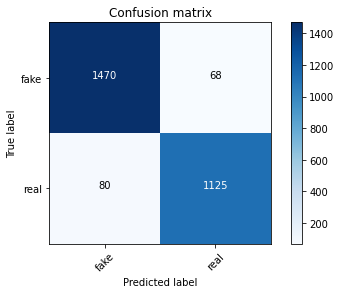

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

ps_clf = PassiveAggressiveClassifier()
ps_clf.fit(x_train,y_train)
predictions_PS = ps_clf.predict(x_test)
score = metrics.accuracy_score(y_test,predictions_PS)
print("Model Accuracy on Test: %0.3f"%score)
conf_matrix  = metrics.confusion_matrix(y_test,predictions_PS)
plot_confusion_matrix(conf_matrix,classes=['fake','real'])
f1_score = metrics.f1_score(y_test,predictions_PS,average='weighted')
print("F1_score: %0.3f"%f1_score)
precision = metrics.precision_score(y_test,predictions_PS)
recall = metrics.recall_score(y_test,predictions_PS)
print (f"Precision: {precision} \n Recall:{recall}")


### Conclusions:
- Text based Fake Nwes classifier was studied using nltk and Machine Learning 
- Bag of words was used as vectorization technique
- Passive-Aggressive classifier outperformed Multinomial Naive-Bayes in terms of accuracy as well as F1_score. 
- for customized classifications, exact pre-processing techniques has to implemented for the prediction data as well.